## Random Walk Generation


In [2]:
from matplotlib.pyplot import step

import numpy as np
import pandas as pd


def gbm(n_years=10, n_scenarios = 1000, mu = 0.07, sigma =0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1+rets).cumprod()
    return prices
    
    
    

<AxesSubplot:>

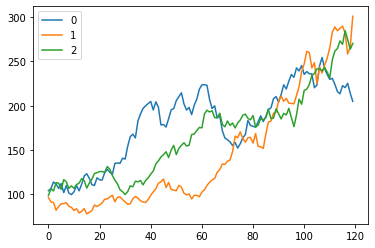

In [23]:
p = gbm(10, n_scenarios = 3)
p.plot()

In [53]:
gbm(n_years=10, n_scenarios = 1000)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,107.029390,97.606825,100.696083,105.818296,105.248312,99.342837,103.239973,99.065321,96.377240,96.608718,...,97.944717,98.379037,103.914020,95.844840,103.537902,104.834038,99.641526,93.730593,100.373143,88.511593
1,101.763056,100.182313,91.653204,106.880418,104.253490,98.726602,98.243715,103.917327,95.772584,96.029110,...,96.165853,95.320028,105.721686,94.261240,106.522502,104.173887,99.327411,91.892258,98.703537,89.700570
2,106.763697,107.541706,87.675382,111.426644,105.917352,106.661303,94.754406,101.077596,96.053611,98.501701,...,88.497354,95.024684,103.638051,92.216504,97.612020,94.166337,105.154186,96.065956,98.531532,95.535925
3,112.576456,102.627318,81.326628,112.115435,101.135357,109.122338,101.732817,97.559456,100.233598,105.420452,...,87.467536,95.070185,103.705985,90.447954,96.690646,93.675415,102.242950,93.518607,92.151103,93.811106
4,115.863131,97.388956,88.409095,117.212413,97.259906,115.979080,97.649521,100.478831,102.243451,102.364352,...,90.573207,95.764103,106.427552,90.738242,103.320790,93.637563,98.092598,92.506949,90.058257,97.055752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,165.550827,150.748614,173.082029,180.076339,111.310053,96.794205,320.743143,306.869464,99.230123,315.649954,...,214.813531,334.445575,52.443452,249.534622,118.720197,266.740448,67.577590,76.917534,146.425197,206.535781
116,168.468489,143.991551,179.018194,181.699064,111.802756,98.091356,334.753899,295.790495,96.479404,323.760428,...,220.883538,328.020549,53.626658,266.885648,109.675533,270.013106,65.436587,77.187162,149.261295,214.348734
117,172.357873,136.143338,170.938240,172.896460,106.878479,97.399792,311.415270,301.272569,98.478444,336.688142,...,217.049641,314.351509,51.233559,258.452442,111.383739,277.583978,62.899646,74.487690,135.727899,211.879211
118,168.155266,138.328987,177.275232,188.687793,110.111097,98.231073,305.032618,300.854596,107.193801,346.328911,...,205.745992,305.193649,50.022528,263.402079,108.084702,289.913163,66.030458,72.889154,138.092016,219.187837


In [54]:
def gbm0(n_years=10, n_scenarios = 1000, mu = 0.07, sigma =0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1+rets).cumprod()
    return prices


#Améliorer la function

def gbm1(n_years=10, n_scenarios = 1000, mu = 0.07, sigma =0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(size=(n_steps, n_scenarios), loc=(1+mu*dt), scale= (sigma * np.sqrt(dt)))
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [63]:
%timeit gbm0(n_years=5, n_scenarios=1000)

2.53 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
%timeit gbm1(n_years=5, n_scenarios=1000)

2.3 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot:>

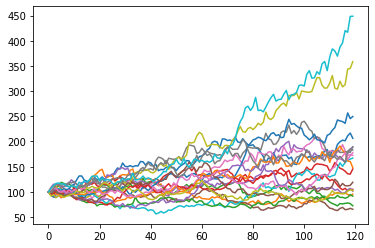

In [81]:
gbm1(n_years=10, n_scenarios=20).plot(legend = False)

In [80]:
def gbm1(n_years=10, n_scenarios = 1000, mu = 0.07, sigma =0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(size=(n_steps, n_scenarios), loc=(1+mu*dt), scale= (sigma * np.sqrt(dt)))
    rets_plus_1[0] = 1
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [83]:
gbm1().head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,97.472371,97.389822,103.004299,100.413663,94.111285,103.029039,94.255547,97.854876,100.918899,99.206627,...,96.631555,96.883766,96.111769,100.824317,105.232127,99.517585,102.131489,102.594494,96.243644,100.074969
2,99.661944,100.984901,106.558783,96.559267,101.568736,106.503293,90.168597,104.051640,103.029575,104.295938,...,100.632966,98.930947,97.255117,97.822298,112.016989,108.903015,109.043848,101.959005,96.319518,90.135508
3,106.299804,111.396754,109.404880,93.543701,95.987167,108.486003,84.660737,102.906464,107.639263,104.329630,...,101.137335,100.182469,95.685104,101.468178,110.969836,109.195466,114.847250,98.827885,96.996777,92.141333
4,108.406152,120.489075,103.503765,90.770652,99.276437,104.226347,81.106303,101.469679,113.716105,116.628223,...,98.722197,95.588271,98.567599,95.363461,115.611677,113.805620,111.623852,96.990649,97.474132,89.956487


In [84]:
import ipywidgets as widgets

In [85]:
def squareit(n):
    return n*n

In [86]:
squareit(5)

25

In [87]:
widgets.interact(squareit, n=(0, 100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squareit(n)>